# Room Cancellation Classification
 

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
# import missingno as msno
from matplotlib import rcParams
from matplotlib import pyplot as plt
# add more when required

rcParams["figure.figsize"] = 20, 10

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Data Description

[Original Source](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

This data consists of room reservations for two hotels: (i) a city hotel and (ii) a resort hotel. The columns are described as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|


## Part 0

The `children`, `adults` and `babies` columns cannot have a value of zero simultaneously. Filter out the rows, which show this behavior

In [3]:
print("Original dataset length:" ,len(df)) #before removing enteries
index_names = df[ (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)].index
new_df = df.drop(index_names)
print("Filtered dataset length:" , len(new_df)) #after removing
print(len(df)-len(new_df) , 'rows deleted')

Original dataset length: 119390
Filtered dataset length: 119210
180 rows deleted


## Part A - EDA

To make ourselves familiar with the data, we will start with an explorative data analysis. 

###  1

#### (a)
Determine and visualize the top 10 countries and guest counts from which the maximum number of guests are coming from.

#### (b)
Repeat (a) but show the guest counts for the city and resort hotels separately. They both should be shown in the same plot

#### (c)
Repeat (b) for the non-cancelled bookings


Each part should be done in a separate cell

country
PRT    90036.0
GBR    24568.0
FRA    21579.0
ESP    18153.0
DEU    14198.0
ITA     7856.0
IRL     6909.0
BEL     4911.0
BRA     4867.0
USA     4318.0
Name: guests, dtype: float64
['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'USA']


<AxesSubplot:xlabel='country'>

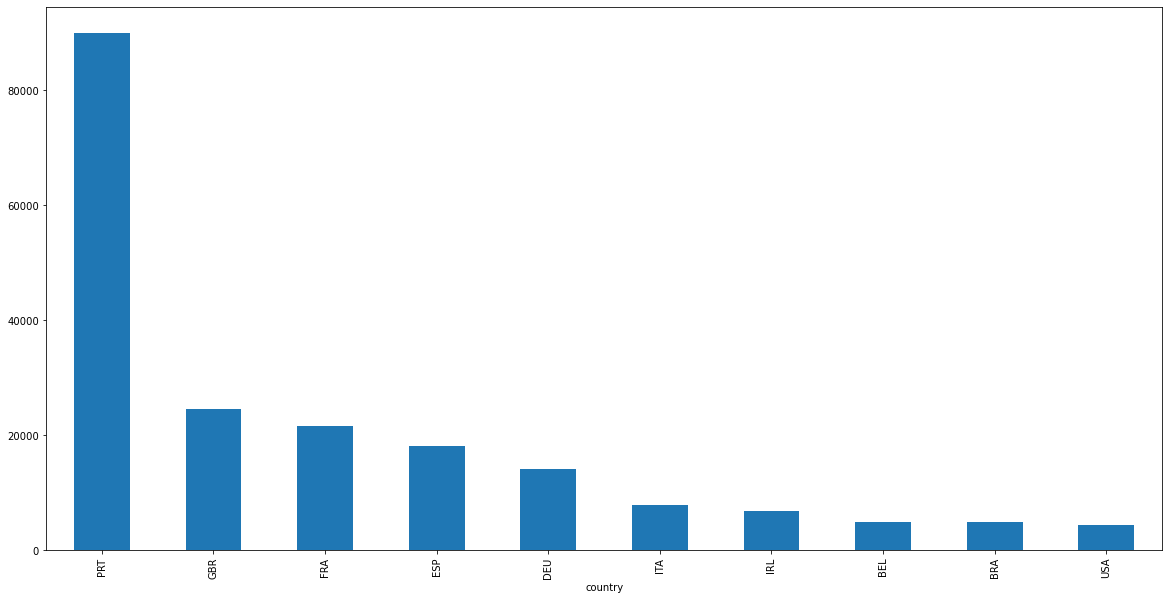

In [4]:
#find guest count by adding children adults and babies count 
cols = ['children' , 'adults' , 'babies']
#add new col 'guests' for guest count
df['guests']= df[cols].sum(axis=1)
#finding guest count for each country in a series
sr = df.groupby('country')['guests'].sum()
#top 10 countries with their guest count
new_sr = sr.sort_values(ascending = False)[:10]
print(new_sr)
country = new_sr.index.tolist()
print(country)
new_sr.plot.bar()

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'USA']
[34471.0, 13631.0, 3287.0, 8543.0, 2224.0, 914.0, 4452.0, 915.0, 951.0, 1073.0]
[55565.0, 10937.0, 18292.0, 9610.0, 11974.0, 6942.0, 2457.0, 3996.0, 3916.0, 3245.0]


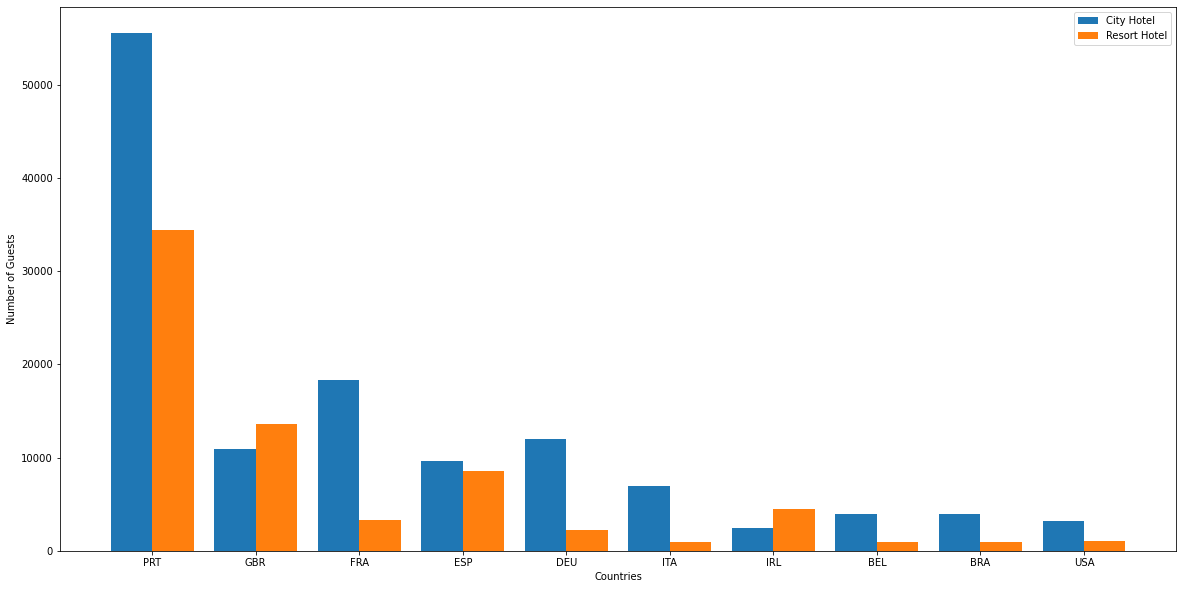

In [5]:
hotel_sr = df.groupby(['country' , 'hotel'])['guests'].sum()
hotel_sr = hotel_sr.sort_values(ascending = False)
d = dict(hotel_sr)
resort = []
city = []
for c in country:
    resort.append(d[c , 'Resort Hotel'])
    city.append(d[(c , 'City Hotel')])
print(country)
print(resort)
print(city)

X_axis = np.arange(len(country))
plt.bar(X_axis - 0.2, city, 0.4, label = 'City Hotel')
plt.bar(X_axis + 0.2, resort, 0.4, label = 'Resort Hotel')
  
plt.xticks(X_axis, country)
plt.xlabel("Countries")
plt.ylabel("Number of Guests")
plt.legend()
plt.show()

119390 75166
['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'USA']
[18850.0, 11678.0, 2817.0, 6607.0, 1915.0, 739.0, 3493.0, 788.0, 720.0, 896.0]
[18820.0, 7580.0, 14482.0, 6606.0, 9744.0, 4155.0, 1609.0, 3067.0, 2280.0, 2316.0]


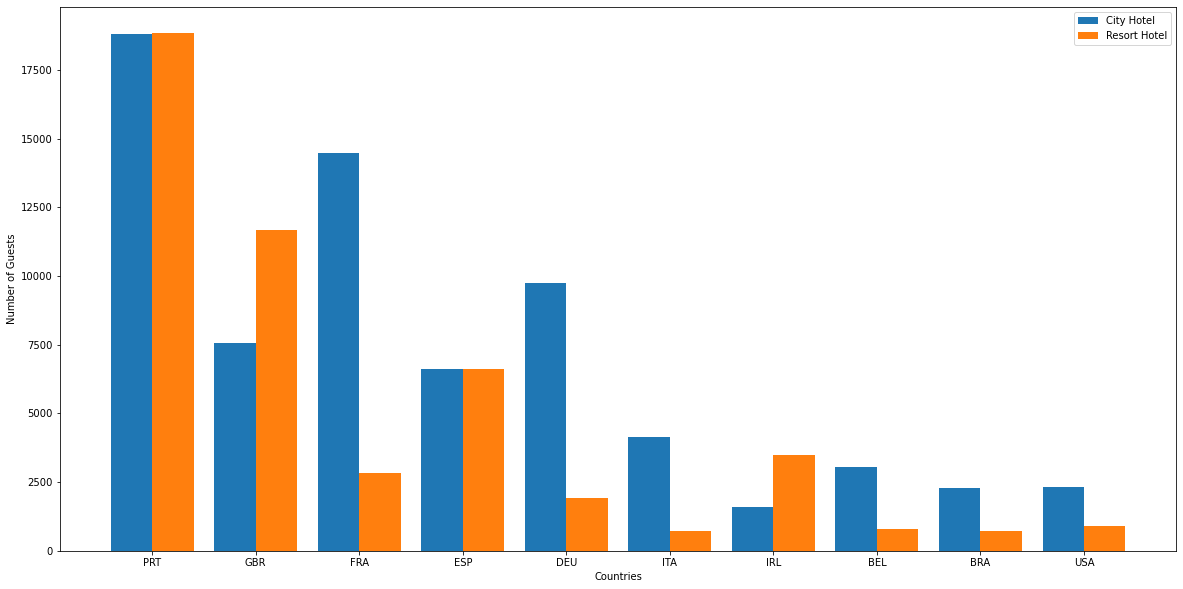

In [6]:
#(c) Repeat (b) for the non-cancelled bookings
new_df = df.loc[df['is_canceled'] == 0]
print(len(df) , len(new_df))

hotel_sr_non = new_df.groupby(['country' , 'hotel'])['guests'].sum()
hotel_sr_non = hotel_sr_non.sort_values(ascending = False)
d_non = dict(hotel_sr_non)
resort_non = []
city_non = []
for c in country:
    resort_non.append(d_non[(c , 'Resort Hotel')])
    city_non.append(d_non[(c , 'City Hotel')])
print(country)
print(resort_non)
print(city_non)

X_axis = np.arange(len(country))
plt.bar(X_axis - 0.2, city_non, 0.4, label = 'City Hotel')
plt.bar(X_axis + 0.2, resort_non, 0.4, label = 'Resort Hotel')
  
plt.xticks(X_axis, country)
plt.xlabel("Countries")
plt.ylabel("Number of Guests")
plt.legend()
plt.show()
# sns.barplot(x = 'country' , y = 'guests'  , hue = 'hotel', data = new_df , order = country)

###  2
Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of the average amount (adr), the guests are charged per night for each room type.

#### (b)
Repeat (a) but separate the results for each hotel. A single plot should be shown


<AxesSubplot:xlabel='assigned_room_type', ylabel='adr'>

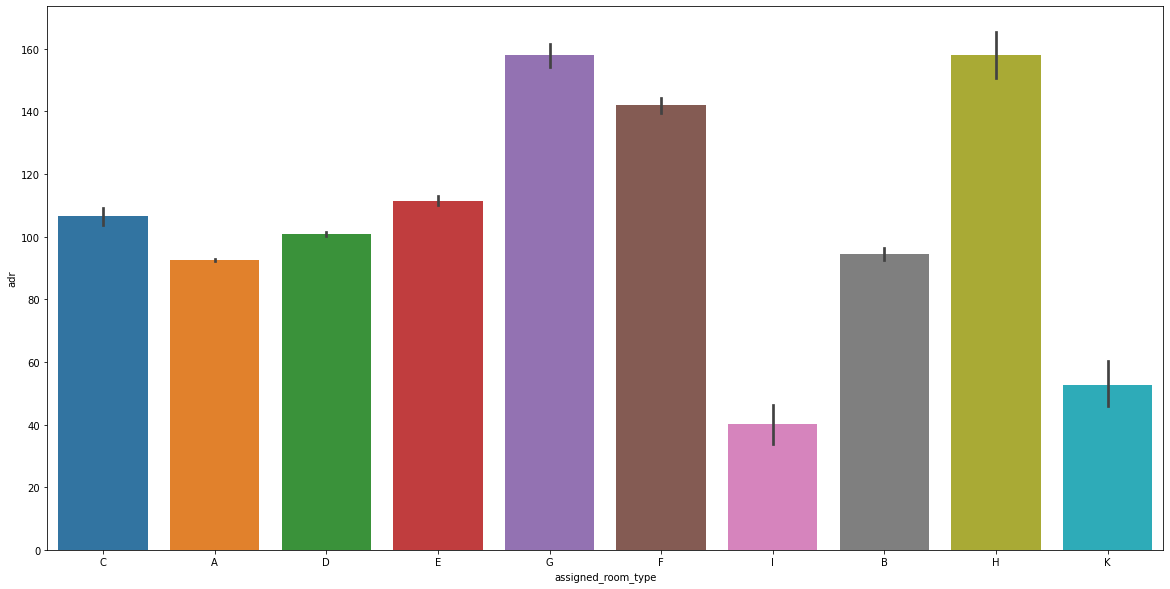

In [7]:
adr_sr = new_df.groupby('assigned_room_type')['adr'].mean()
rooms = adr_sr.index.tolist()
sns.barplot(x = 'assigned_room_type' , y = 'adr' , data = new_df )

<AxesSubplot:xlabel='assigned_room_type', ylabel='adr'>

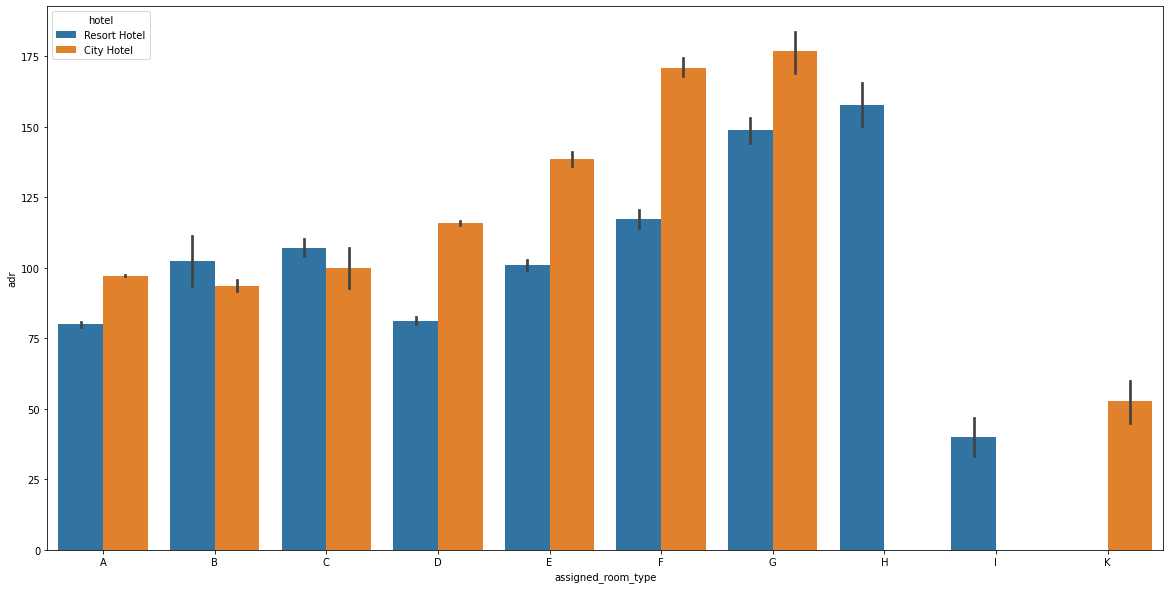

In [8]:
sns.barplot(x = 'assigned_room_type' , y = 'adr' , hue = 'hotel' , data = new_df , order = rooms)

###  3
Consider the non-cancelled bookings only.

#### (a)
Plot the mean values for `adr` by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the mean values for `adr` by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.



<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

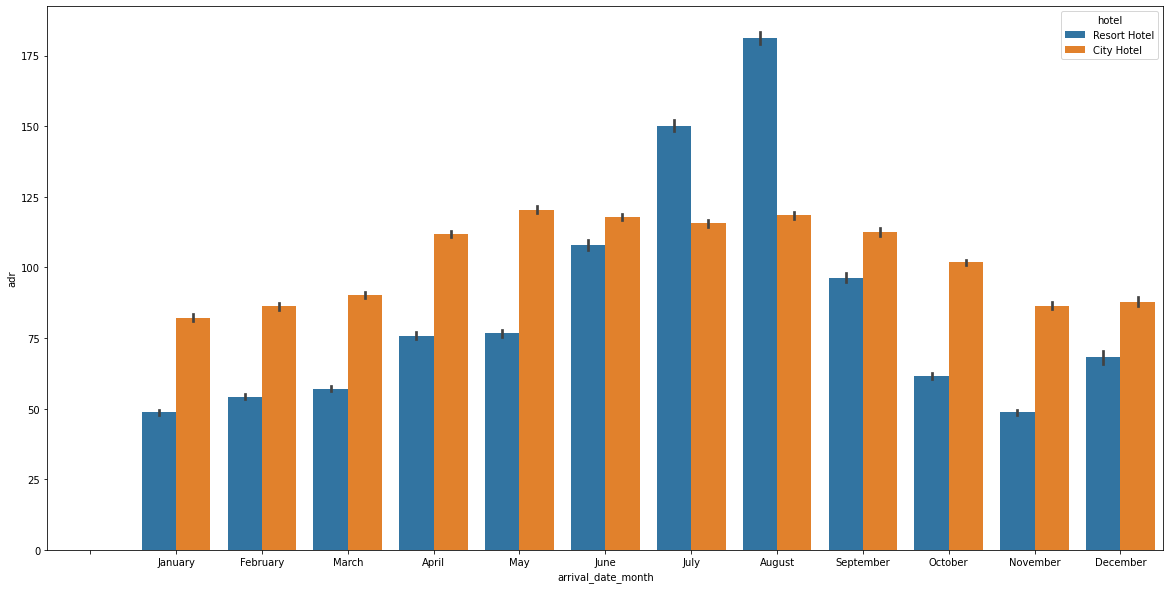

In [9]:
import calendar
months =  list(calendar.month_name)
  
sns.barplot(x = 'arrival_date_month' , y = 'adr' , hue = 'hotel' , data = new_df , order = months)

<AxesSubplot:xlabel='day', ylabel='adr'>

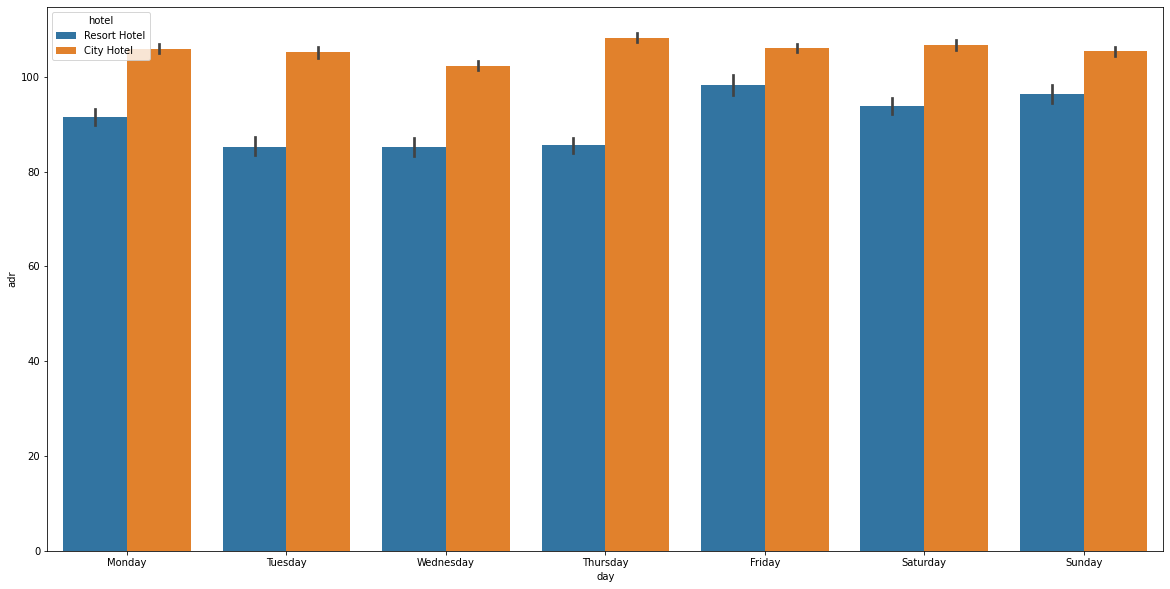

In [10]:
import datetime
def date_to_day(date):
    return datetime.datetime.strptime(date, '%B %d %Y').strftime('%A')

pd.options.mode.chained_assignment = None  # default='warn'
new_df['date'] = new_df['arrival_date_month'] + ' '+ new_df['arrival_date_day_of_month'].astype(str)+ ' ' + new_df['arrival_date_year'].astype(str)
new_df['day'] = new_df['date'].apply(date_to_day)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = 'day' , y = 'adr' , hue = 'hotel' , data = new_df , order = days)

###  4

Consider the non-cancelled bookings only.

#### (a)

Plot the guest counts by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the guest counts by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

<AxesSubplot:xlabel='arrival_date_month', ylabel='guests'>

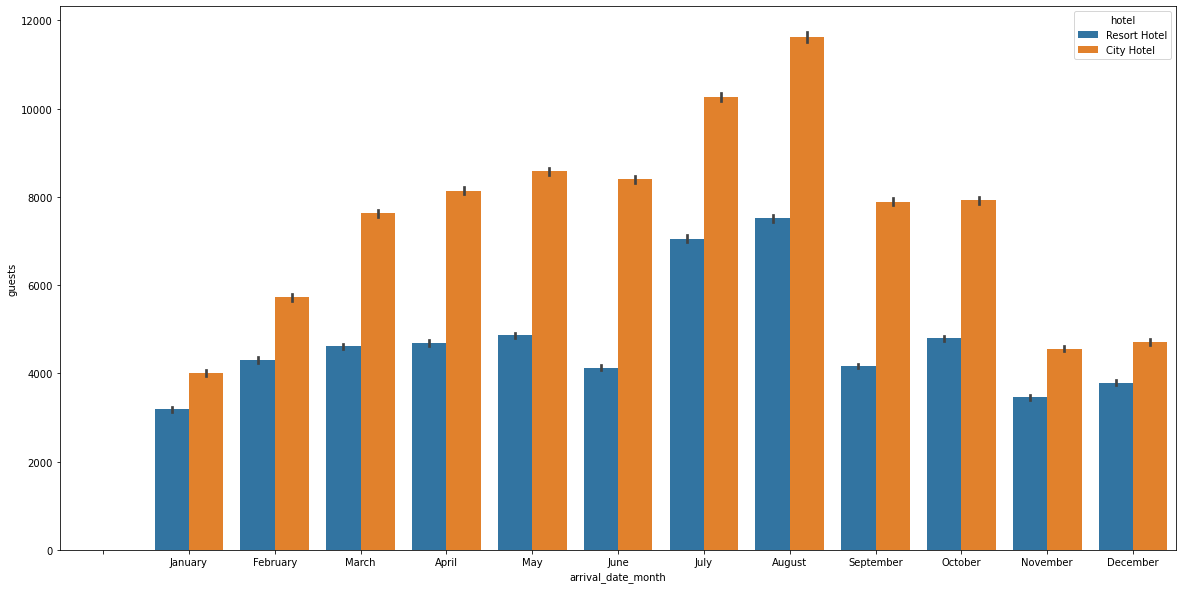

In [11]:
import calendar
months =  list(calendar.month_name)
  
sns.barplot(x = 'arrival_date_month' , y = 'guests' , hue = 'hotel' , data = new_df , order = months , estimator=sum)

<AxesSubplot:xlabel='day', ylabel='guests'>

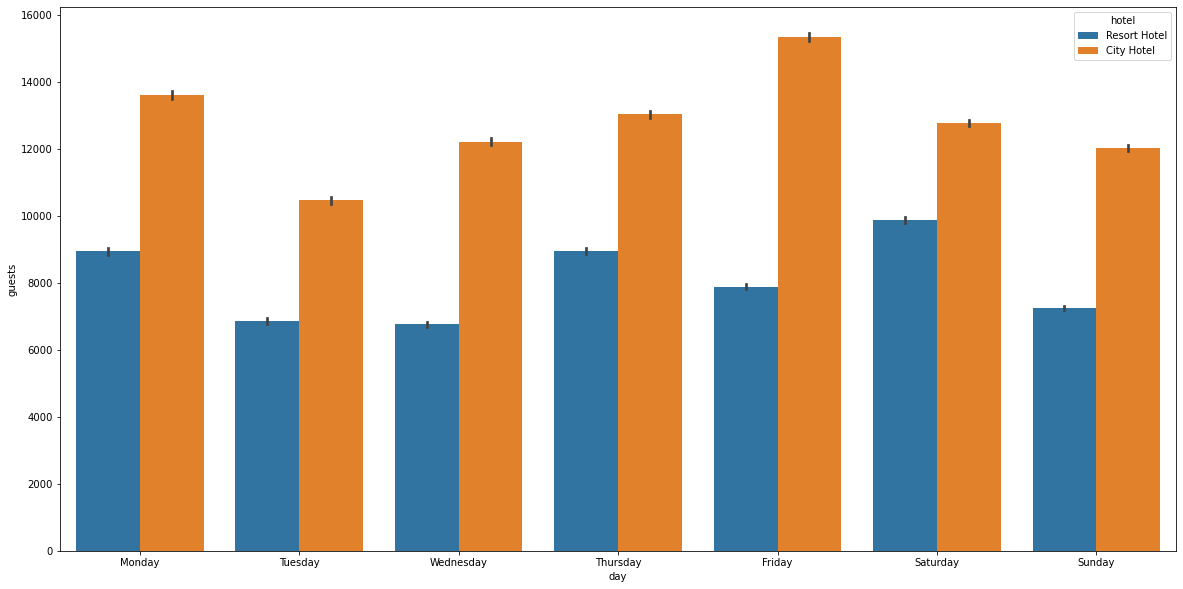

In [12]:

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = 'day' , y = 'guests' , hue = 'hotel' , data = new_df , order = days, estimator = sum)

###  5

Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of stay duration (in number of days) of guests at each hotel.

69 days


<AxesSubplot:xlabel='stay duration', ylabel='stay duration'>

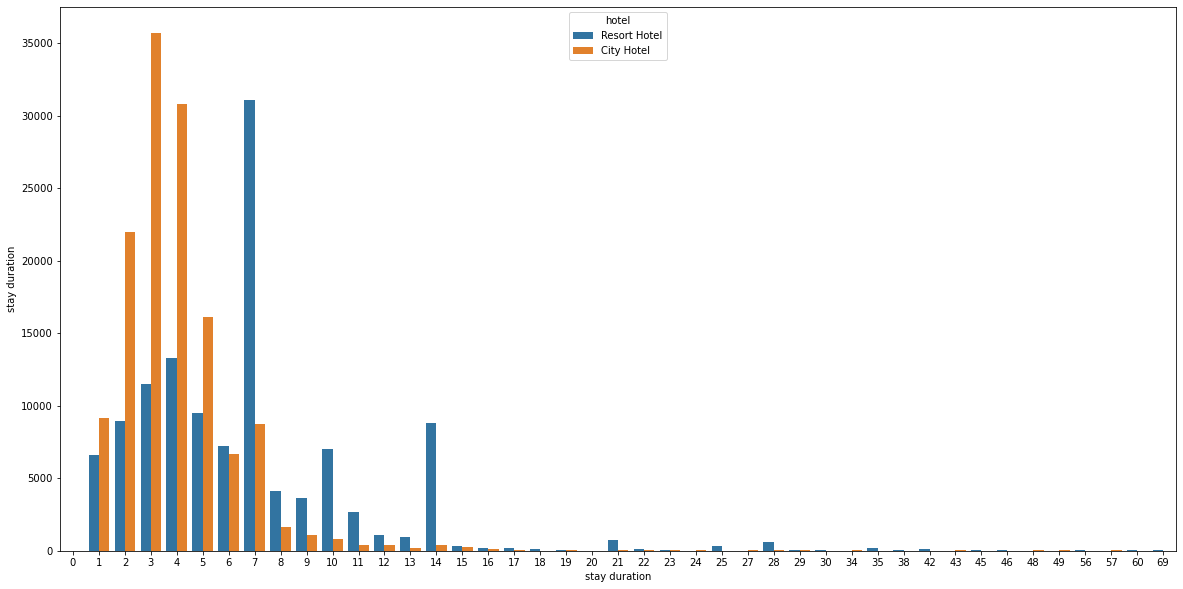

In [13]:
new_df['stay duration'] = new_df['stays_in_week_nights']+new_df['stays_in_weekend_nights']
print(new_df['stay duration'].max() , 'days')
sns.barplot(x = 'stay duration' , y = 'stay duration' , hue = 'hotel' , data = new_df , estimator=sum)

###  6

#### (a), (b) & (c)
Make three visualizations, showing some interesting insights from the data. 

The visualizations should be accompanied by a brief textual description highlighting finding.

<AxesSubplot:xlabel='customer_type', ylabel='guests'>

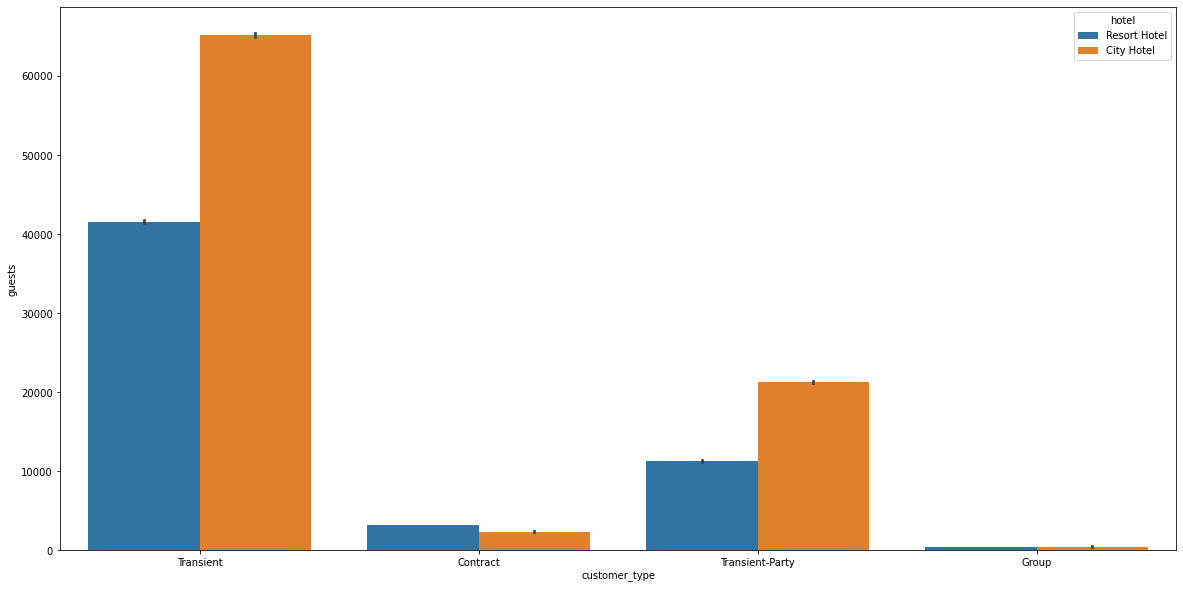

In [16]:
# distribution of guests count according to type in city hotel and resort hotel
sns.barplot(x = 'customer_type' , y = 'guests' , hue = 'hotel' , data = new_df , estimator=sum)

<AxesSubplot:xlabel='distribution_channel', ylabel='guests'>

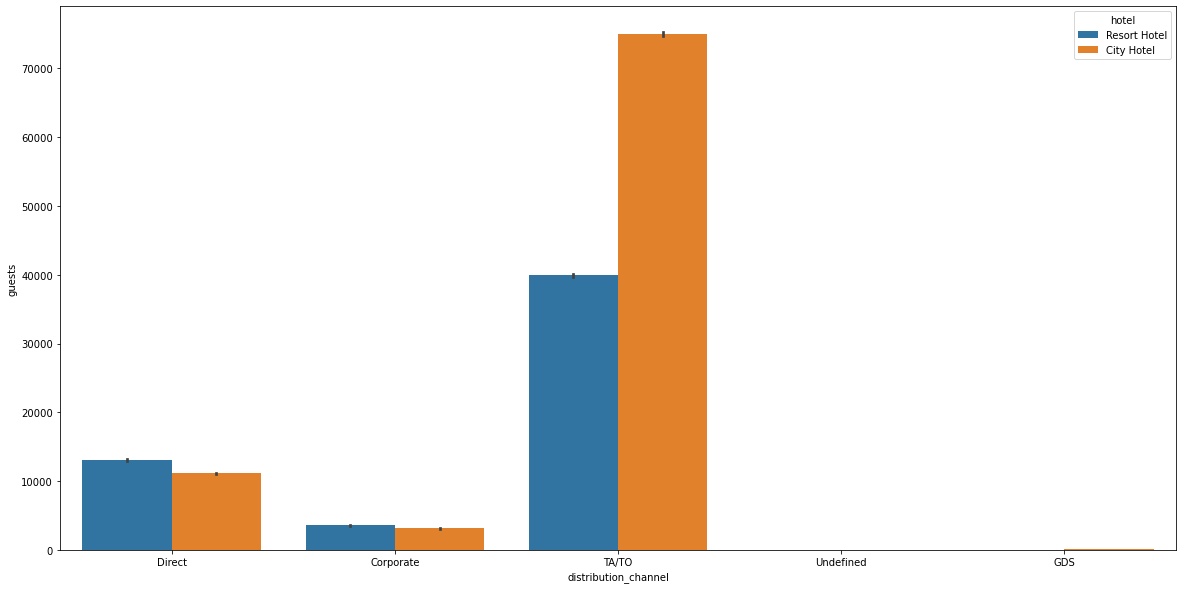

In [17]:
# analsis of guests count according to distribution chanel in city hotel and resort hotel
sns.barplot(x = 'distribution_channel' , y = 'guests' , hue = 'hotel' , data = new_df , estimator=sum)

<AxesSubplot:xlabel='deposit_type', ylabel='guests'>

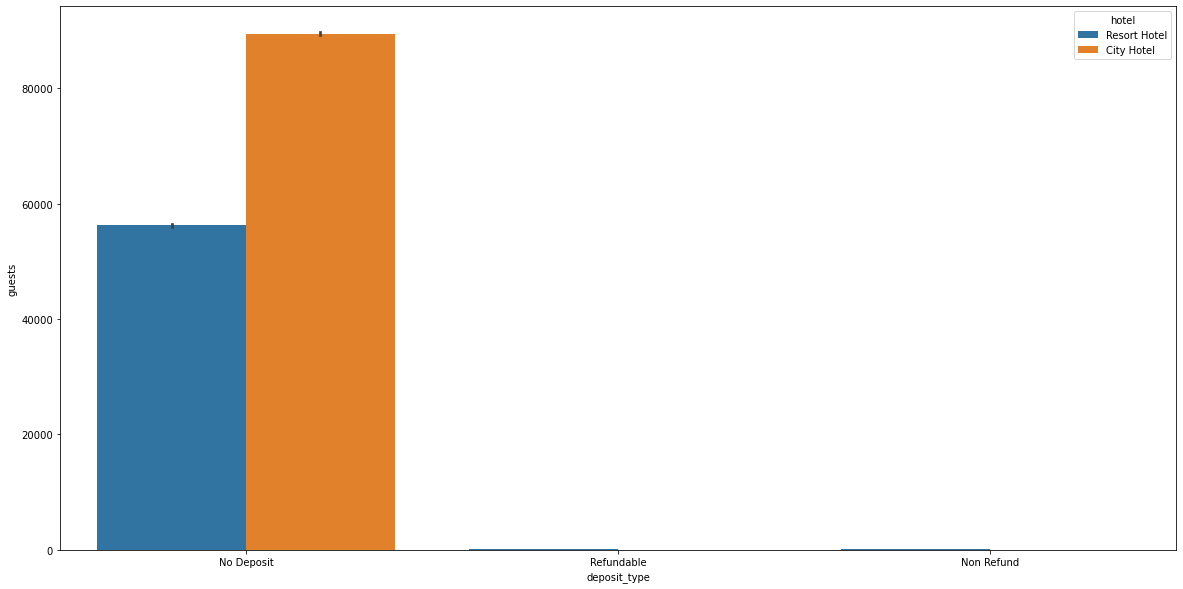

In [25]:
# distribution of guests count according to deposit type in city hotel and resort hotel
sns.barplot(x = 'deposit_type' , y = 'guests' , hue = 'hotel' , data = new_df , estimator=sum)

## Part B - Pre-processing


The task is to classify whether a booking will be cancelled or not. 


###  1
**Feature Selection**

#### (a)
List the features which seem to contribute to data leakage. These will be the features which are related to the predicitve target, but would not be available at prediction time in a real-world setting. 

#### (b)
Find out the percent of missing values of each column and visualize using [missingno](https://github.com/ResidentMario/missingno) . Which features have too many missing values? And which features have sufficiently low number of missing values, such that they can be safely imputed without significantly affecting the overall data distribution.

#### (c)
Visualize the correlations among the different input features.

#### (d)
Find out the correlation of each of the input features with the target attribute.

#### (e)
Using  answers to the previous parts, filter out the irrelevant features from the dataset.

Remember to document findings for each part.

In [20]:
#Following features seem to cause data leakage:
#reservation_status
#reservation_status_date

<AxesSubplot:>

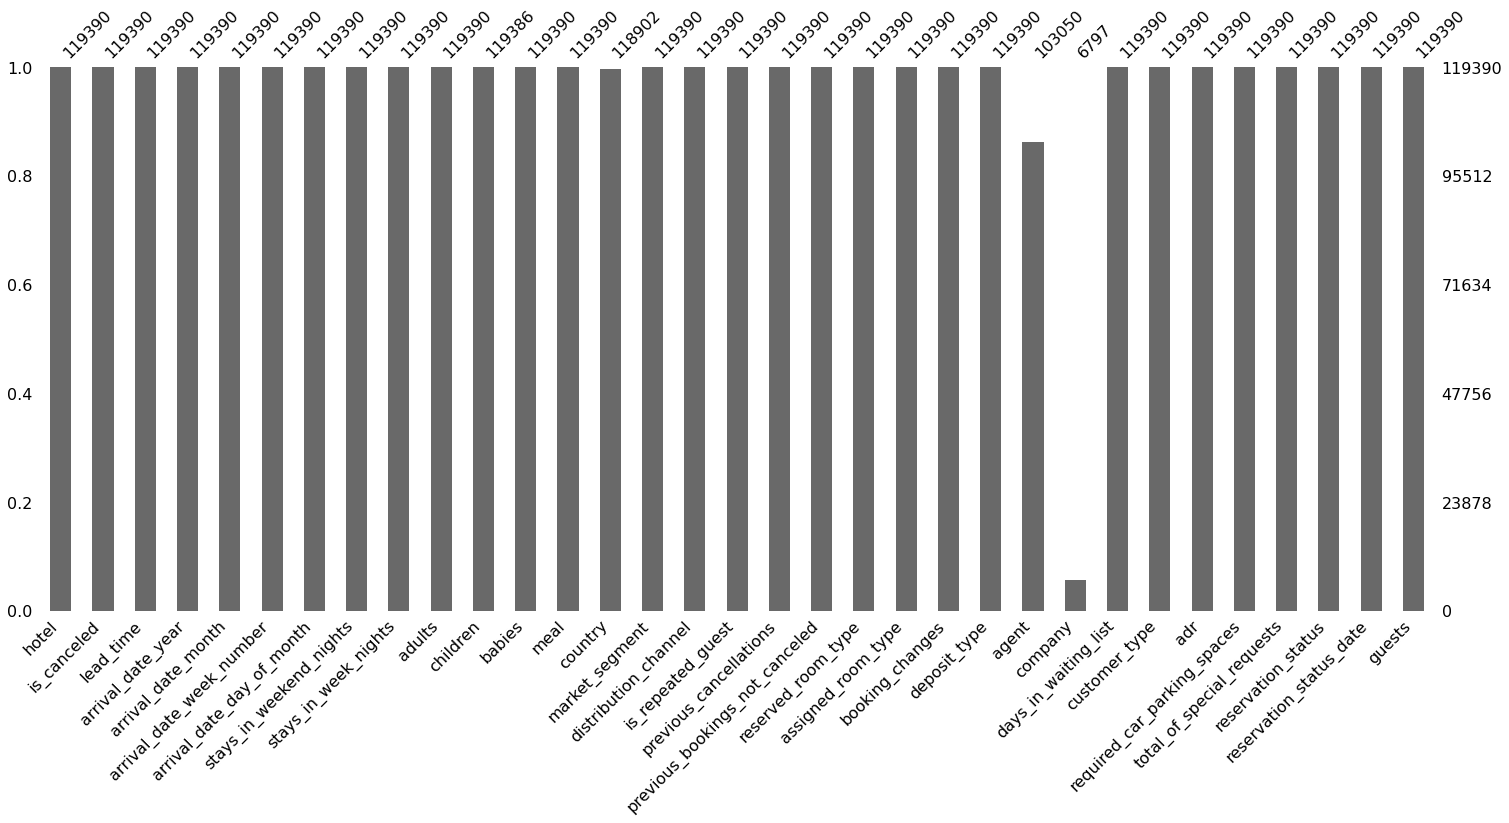

In [31]:
import missingno as msno
# Visualize missing values as a matrix
# msno.matrix(df)

# Visualize the number of missing
# values as a bar chart
msno.bar(df)

#it's evident from the bar chart that 'company' column has the most missing values and secondly 'agent' column has 
#missing values other than that all the other columns have few to no missing values

In [125]:
#LabelEncoder to convert categorical attributes to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# data[data.columns[0:]].corr()['is_canceled']
new_data = data.apply(LabelEncoder().fit_transform)
new_data
print(new_data[new_data.columns[0:]].corr()['is_canceled'])
new_data.corr()

hotel                            -0.136531
is_canceled                       1.000000
lead_time                         0.294009
arrival_date_year                 0.016660
arrival_date_month               -0.001491
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001706
stays_in_week_nights              0.025145
adults                            0.064491
children                          0.005418
babies                           -0.034133
meal                             -0.017678
country                           0.264223
market_segment                    0.059338
distribution_channel              0.167600
is_repeated_guest                -0.084793
previous_cancellations            0.153201
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
assigned_room_type               -0.176028
booking_changes                  -0.144474
deposit_type                      0.468634
agent      

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
hotel,1.000000,-0.136531,-0.073520,-0.035267,-0.035378,-0.001270,0.001862,0.186886,0.235340,0.009338,...,-0.159021,0.559692,-0.027840,-0.083225,-0.047531,-0.164640,0.219948,0.043390,0.124331,-0.005842
is_canceled,-0.136531,1.000000,0.294009,0.016660,-0.001491,0.008148,-0.006130,-0.001706,0.025145,0.064491,...,0.468634,-0.130010,0.091631,0.066820,-0.068140,0.048726,-0.196593,-0.234658,-0.917196,-0.162135
lead_time,-0.073520,0.294009,1.000000,0.037462,0.087479,0.129658,0.002276,0.090965,0.172448,0.132525,...,0.372126,-0.184575,0.128181,0.167575,0.074325,-0.067820,-0.118272,-0.094560,-0.303190,-0.066347
arrival_date_year,-0.035267,0.016660,0.037462,1.000000,-0.251837,-0.540561,-0.000221,0.021532,0.031065,0.041658,...,-0.064714,0.035281,0.025237,-0.073191,-0.006149,0.216679,-0.014104,0.108531,-0.017683,0.897770
arrival_date_month,-0.035378,-0.001491,0.087479,-0.251837,1.000000,0.302228,-0.017938,-0.031915,-0.025886,-0.074384,...,0.068173,-0.008380,-0.033019,0.043024,0.012029,-0.098397,-0.018831,-0.053047,-0.001611,-0.171977
arrival_date_week_number,-0.001270,0.008148,0.129658,-0.540561,0.302228,1.000000,0.066809,0.018385,0.015966,0.026636,...,0.003891,-0.042837,0.015806,0.018378,-0.028432,0.080041,0.002250,0.026149,-0.017387,-0.212113
arrival_date_day_of_month,0.001862,-0.006130,0.002276,-0.000221,-0.017938,0.066809,1.000000,-0.016298,-0.028197,0.000836,...,-0.001358,0.003976,0.006251,0.028028,0.012188,0.029026,0.008719,0.003062,0.011460,0.032455
stays_in_weekend_nights,0.186886,-0.001706,0.090965,0.021532,-0.031915,0.018385,-0.016298,1.000000,0.494903,0.105348,...,-0.111642,-0.016854,0.105344,-0.061138,-0.109461,0.041959,-0.018697,0.072666,0.008500,0.045489
stays_in_week_nights,0.235340,0.025145,0.172448,0.031065,-0.025886,0.015966,-0.028197,0.494903,1.000000,0.108202,...,-0.077181,0.014775,0.089474,-0.002340,-0.128053,0.056792,-0.025238,0.068274,-0.021940,0.036164
adults,0.009338,0.064491,0.132525,0.041658,-0.074384,0.026636,0.000836,0.105348,0.108202,1.000000,...,-0.030684,-0.199333,0.272982,-0.019150,-0.110373,0.290120,0.018410,0.146645,-0.078250,0.039944


Text(0.5, 1.0, 'Correlation')

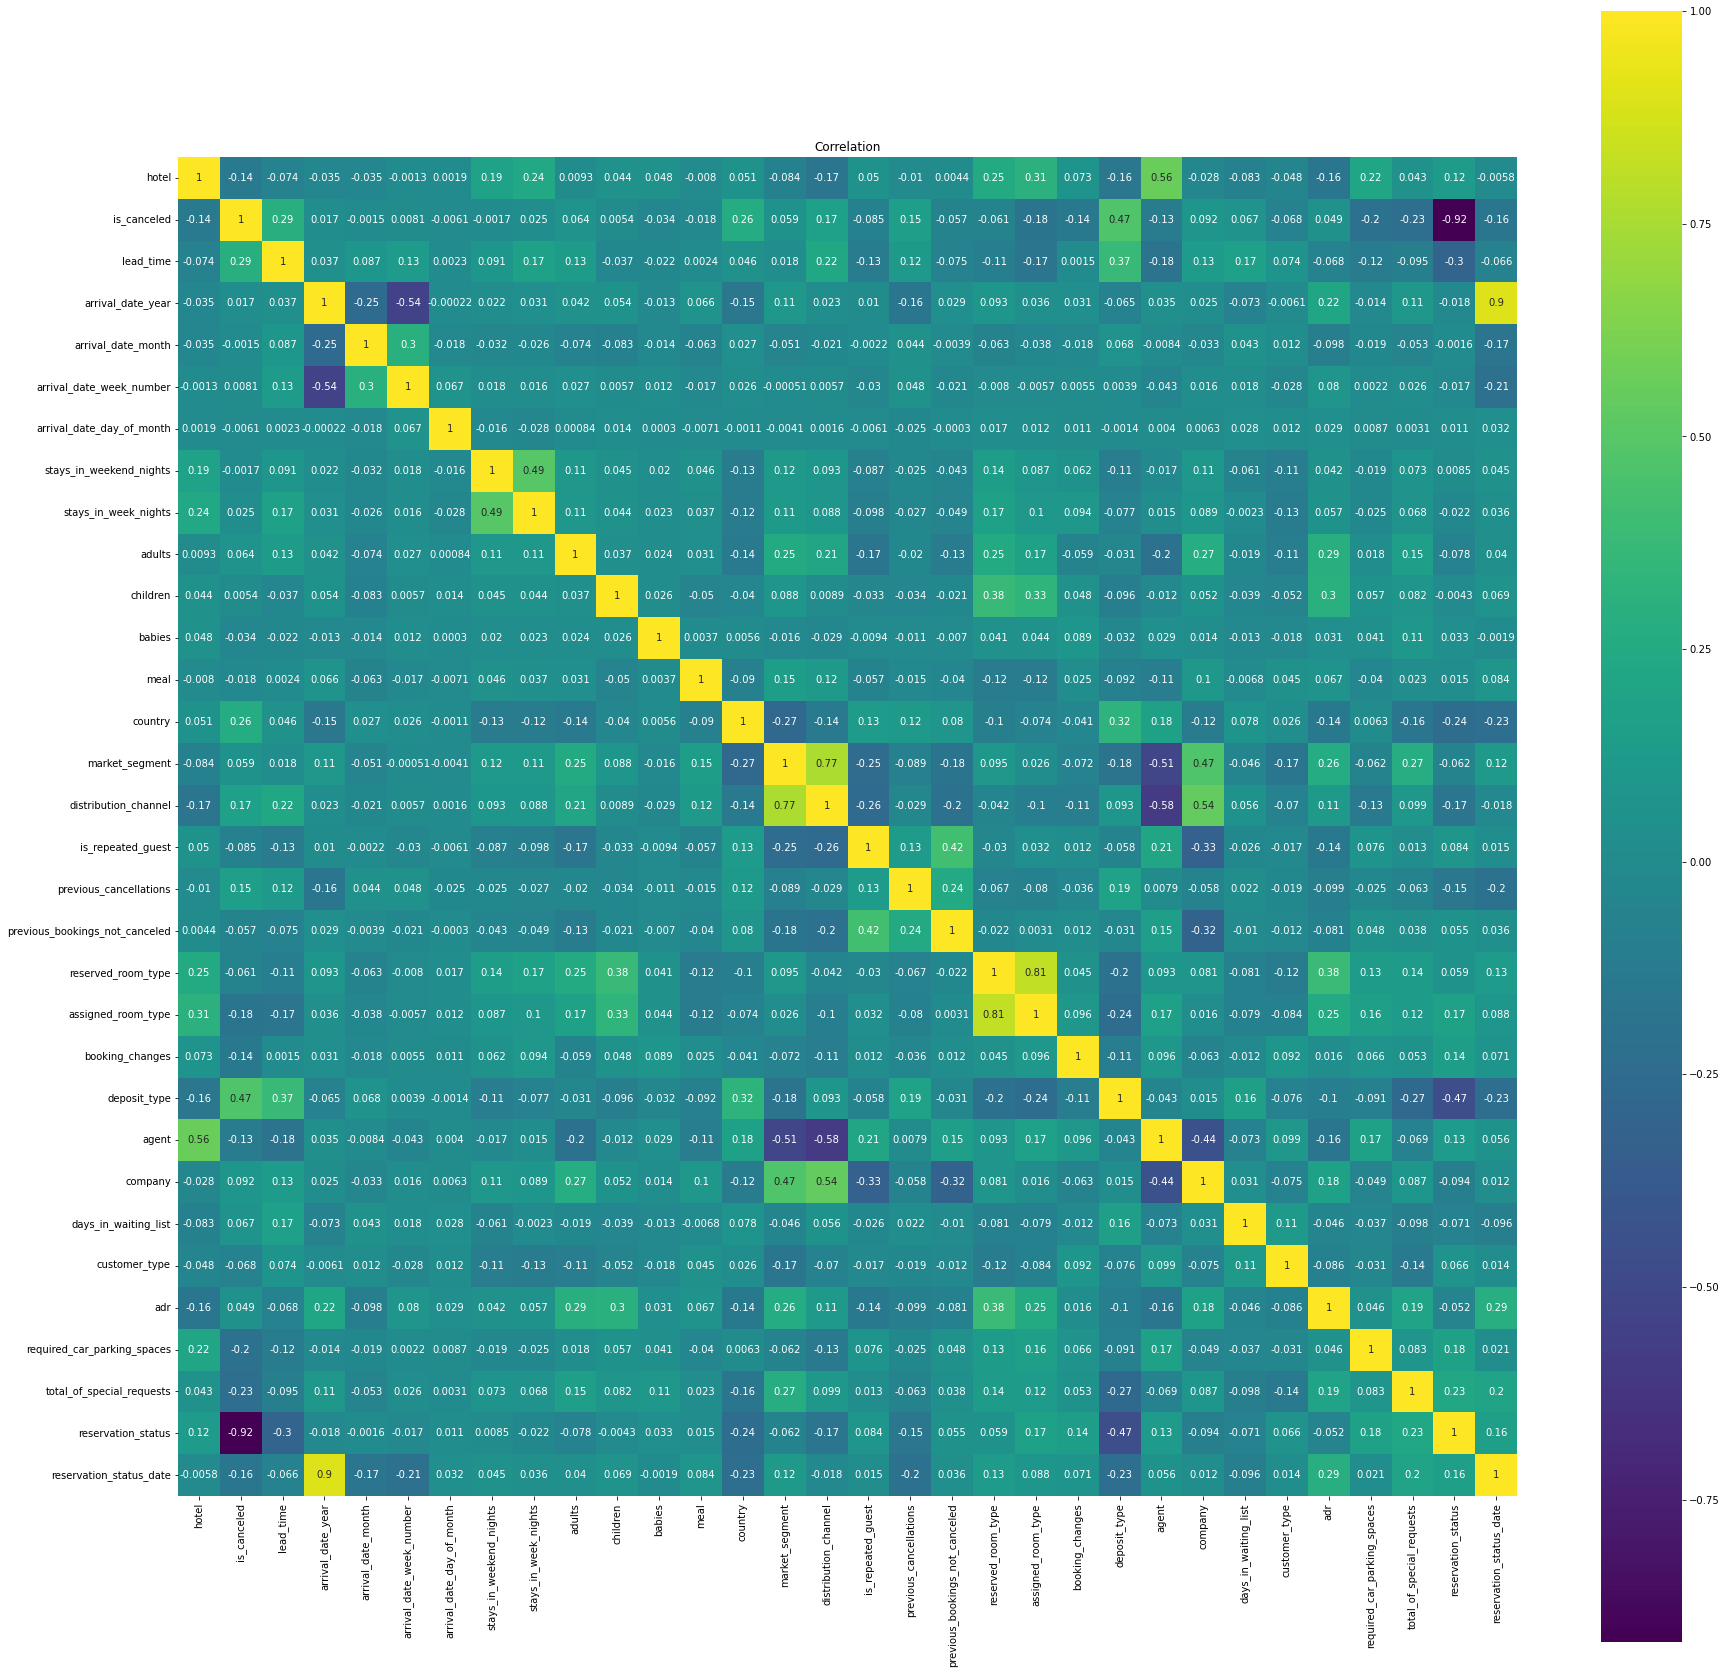

In [60]:
# import matplotlib.pyplot as plt
# data = pd.read_csv("hotel_bookings.csv")
correlation = new_data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation')

In [73]:
#from above results 
new_data_ = new_data.drop(['reservation_status', 'booking_changes' , 'reservation_status_date' , 'agent' , 'reservation_status' ,'company' ] , axis=1)
new_data_

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,0,5,26,0,0,0,2,...,0,0,2,2,0,0,2,1,0,0
1,1,0,478,0,5,26,0,0,0,2,...,0,0,2,2,0,0,2,1,0,0
2,1,0,7,0,5,26,0,0,1,1,...,0,0,0,2,0,0,2,2136,0,0
3,1,0,13,0,5,26,0,0,1,1,...,0,0,0,0,0,0,2,2136,0,0
4,1,0,14,0,5,26,0,0,2,2,...,0,0,0,0,0,0,2,3535,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2,1,34,29,2,5,2,...,0,0,0,0,0,0,2,3437,0,0
119386,0,0,102,2,1,34,30,2,5,3,...,0,0,4,4,0,0,2,8127,0,2
119387,0,0,34,2,1,34,30,2,5,2,...,0,0,3,3,0,0,2,6405,0,4
119388,0,0,109,2,1,34,30,2,5,2,...,0,0,0,0,0,0,2,3921,0,0


###  2

Use sklearn transformations. 

Develop appropriate encoding and scaling steps for the categorical and numerical columns in dataset respectively. 

For this, a single sklearn `Transformer` should be developed which can be applied for the entire dataset.
If separate transformations need to be applied for different columns, then compose them into a single transformation using sklearn's `ColumnTransformer`.  

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder ,  RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
y = new_data_.is_canceled
X = new_data_.drop('is_canceled' , axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [75]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes!='O']
num_cols
cat_cols = [col for col in X_train.columns if (X_train[col].dtypes=='O')]
cat_cols
pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
    ('rob_num', RobustScaler())
])

pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='constant', add_indicator=False, fill_value='missing')),
    ('ohe_cat', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])
from sklearn.impute import MissingIndicator
ct = ColumnTransformer([
    ('mi', MissingIndicator(), X_train.columns),
    ('pp_num', pp_num, num_cols),
    ('pp_cat', pp_cat, cat_cols)
])
xt = ct.fit_transform(X_train)
xt

array([[ 0.        , -0.03521127,  1.        , ...,  1.2199208 ,
         0.        ,  0.        ],
       [ 0.        , -0.24647887,  1.        , ...,  0.79561377,
         0.        ,  0.        ],
       [ 0.        , -0.42957746,  0.        , ...,  1.57538836,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.03521127,  0.        , ..., -0.03472434,
         0.        ,  0.        ],
       [ 1.        ,  0.42957746, -1.        , ...,  0.44928419,
         0.        ,  2.        ],
       [ 1.        , -0.37323944, -1.        , ...,  0.43801401,
         0.        ,  1.        ]])

In [27]:
# num_cols = [col for col in X_train.columns if X_train[col].dtypes!='O']
# num_cols
# cat_cols = [col for col in X_train.columns if (X_train[col].dtypes=='O')]
# cat_cols
# ct1 = ColumnTransformer([
#     ('si_num', SimpleImputer(strategy='median', add_indicator=True), num_cols),
# ], remainder='drop')
# pd.DataFrame(ct1.fit_transform(X_train)).head()
# ct2 = ColumnTransformer([
#     ('si_num', SimpleImputer(strategy='median', add_indicator=True), num_cols),
#     ('rob_num', RobustScaler(), num_cols)
# ], remainder='drop')
# pd.DataFrame(ct2.fit_transform(X_train)).head()
# ct3 = ColumnTransformer([
#     ('si_num', SimpleImputer(strategy='median', add_indicator=True), num_cols),
#     ('si_cat', SimpleImputer(strategy='constant', fill_value='missing', add_indicator=True), cat_cols)
# ], remainder='drop')
# pd.DataFrame(ct3.fit_transform(X_train)).head()
# ct4 = ColumnTransformer([
#     ('rob_num', RobustScaler(), list(range(8))),
#     ('ohe_cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), list(range(10,36 )))
# ])

In [28]:
# xtf = ct3.fit_transform(X_train)
# ct4.fit_transform(xtf)

In [29]:
# num_cols = [col for col in X_train.columns if X_train[col].dtypes!='O']
# num_cols
# cat_cols = [col for col in X_train.columns if (X_train[col].dtypes=='O')]
# cat_cols
# pp_num = Pipeline([
#     ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
#     ('rob_num', RobustScaler())
# ])

# pp_cat = Pipeline([
#     ('cat_imp', SimpleImputer(strategy='constant', add_indicator=False, fill_value='missing')),
#     ('ohe_cat', OneHotEncoder(sparse=False, handle_unknown='ignore'))
# ])
# from sklearn.impute import MissingIndicator
# ct = ColumnTransformer([
#     ('mi', MissingIndicator(), X_train.columns),
#     ('pp_num', pp_num, num_cols),
#     ('pp_cat', pp_cat, cat_cols)
# ])
# xt = ct.fit_transform(X_train)
# xt

## Part C - Modeling

Now, we will be training different ML models to perform the required predictive task. Specifically, the following classification models will be trained:
* kNN
* Naive Bayes
* Decision tree
* [xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html) 

###  1

Split data into training and testing data, with 85% of the dataset going to testing data. Set a suitable seed value so that the splits are reproducible

In [ ]:
from sklearn.model_selection import train_test_split
y = new_data_.is_canceled
X = new_data_.drop('is_canceled' , axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


###  2

For each of the required models perform the following tasks:
* Compose an sklearn pipeline with the developed pre-processing (developed in the previous part) and the model.
* Train the model with default hyper-parameters and report its evlauation score on the test set.
* Tune the hyper-parameters of the model with `GridSearchCV`.
* Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set.

#### kNN

In [77]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline, make_pipeline

pipe_knn = make_pipeline(ct, KNeighborsClassifier())
model = pipe_knn.fit(X_train, y_train)
score = model.score(X_test,y_test)
print(model)
print('Score:' , score)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                                  Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel...
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'days_in_waiting_list',
                                                   'customer_type', 'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('pp_cat',
                           

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors=list(range(1, 3)))
grid_knn = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=1)
#passing transformed dataset as xt after column transformation
grid_search_knn=grid_knn.fit(xt, y_train)
grid_search_knn.cv_results_


Fitting 3 folds for each of 2 candidates, totalling 6 fits


{'mean_fit_time': array([0.02734725, 0.03712217]),
 'std_fit_time': array([0.00479503, 0.0094188 ]),
 'mean_score_time': array([50.51346644, 61.63926093]),
 'std_score_time': array([4.22094576, 1.7727163 ]),
 'param_n_neighbors': masked_array(data=[1, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1}, {'n_neighbors': 2}],
 'split0_test_score': array([0.81776493, 0.82611973]),
 'split1_test_score': array([0.81433552, 0.82388416]),
 'split2_test_score': array([0.81235669, 0.82699375]),
 'mean_test_score': array([0.81481905, 0.82566588]),
 'std_test_score': array([0.00223422, 0.00130942]),
 'rank_test_score': array([2, 1])}

In [107]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [81]:
# dir(grid_knn)
# Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set./
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import average_precision_score

print('Accuracy:' , score)

acc_knn = grid_search_knn.best_score_
print('Average accuracy:' , acc_knn)

y_pred_knn = pipe_knn.predict(X_test)
bal_knn = balanced_accuracy_score(y_test,y_pred_knn)
print('Balanced Accuracy:' , bal_knn) 

f1_knn = f1_score(y_test,y_pred_knn)
print('F1 score:' , f1_knn)

auc_knn = roc_auc_score(y_test,y_pred_knn)
print('ROC AUC Score:' , auc_knn)
# metrics.roc_curve(y_pred_knn, y_test, pos_label=2)

prec_knn = average_precision_score(y_test, y_pred_knn)
print('Average Precision:' , prec_knn)

Accuracy: 0.8331518552642599
Average accuracy: 0.8256658801632154
Balanced Accuracy: 0.8181664453599611
F1 score: 0.773404618359686
ROC AUC Score: 0.8181664453599611
Average Precision: 0.6893679747312007


#### Naive Bayes

In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

pipe_nb = make_pipeline(ct,MinMaxScaler(),  MultinomialNB())
model_nb = pipe_nb.fit(X_train, y_train)
score_nb = model_nb.score(X_test,y_test)
print(model_nb)
print('Score:' , score_nb)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                                  Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel...
                                                   'deposit_type',
                                                   'days_in_waiting_list',
                                                   'customer_type', 'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('pp_cat',
                                                  Pipeline(steps=[('cat_imp',
                      

In [83]:
MultinomialNB().get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

param_grid = {  
# 'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}
pipe = make_pipeline(MinMaxScaler(),  MultinomialNB())
grid_nb = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
#passing transformed dataset as xt after column transformation
grid_search_nb=grid_nb.fit(xt, y_train)
# print('Best params are:' , grid_search_nb.best_params_)
grid_search_nb.cv_results_
# print("Accuracy:" , grid_search_nb.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'mean_fit_time': array([0.11514163]),
 'std_fit_time': array([0.01703332]),
 'mean_score_time': array([0.0148622]),
 'std_score_time': array([0.00170371]),
 'params': [{}],
 'split0_test_score': array([0.75202848]),
 'split1_test_score': array([0.75548343]),
 'split2_test_score': array([0.75447597]),
 'split3_test_score': array([0.75301016]),
 'split4_test_score': array([0.75390012]),
 'mean_test_score': array([0.75377963]),
 'std_test_score': array([0.00118836]),
 'rank_test_score': array([1])}

In [88]:
# dir(grid_knn)
# Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set./
from sklearn.metrics import balanced_accuracy_score , average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

print('Accuracy:' , score_nb)

acc_nb = grid_search_nb.best_score_
print('Average accuracy:' , acc_nb)

y_pred_nb = pipe_nb.predict(X_test)
bal_nb = balanced_accuracy_score(y_test,y_pred_nb )
print('Balanced Accuracy:' , bal_nb ) 

f1_nb = f1_score(y_test,y_pred_nb)
print('F1 score:' , f1_nb)

auc_nb = roc_auc_score(y_test,y_pred_nb)
print('ROC AUC Score:' , auc_nb)
# metrics.roc_curve(y_pred_nb, y_test, pos_label=2)

prec_nb = average_precision_score(y_test, y_pred_nb)
print('Average Precision:' , prec_nb)

Accuracy: 0.7536225814557334
Average accuracy: 0.7537796302805033
Balanced Accuracy: 0.6750397218074771
F1 score: 0.5226000162298142
ROC AUC Score: 0.675039721807477
Average Precision: 0.5856490153559201


In [91]:
# MultinomialNB.pipe_nb.get_params().keys

#### Decision Tree

In [92]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

pipe_dec = make_pipeline(ct,MinMaxScaler(),   DecisionTreeClassifier())
model_dec = pipe_dec.fit(X_train, y_train)
score_dec = model_dec.score(X_test,y_test)
print(model_dec)
print('Score:' , score_dec)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                                  Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel...
                                                   'days_in_waiting_list',
                                                   'customer_type', 'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('pp_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(fill_val

In [94]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline, make_pipeline
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [95]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

param_grid = {  
            'decisiontreeclassifier__criterion': ['gini','entropy'],
            'decisiontreeclassifier__max_depth' : [3,5,7]     
}
pipe = make_pipeline(DecisionTreeClassifier())
# pipe.get_params().keys() 
grid_dec = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
#passing transformed dataset as xt after column transformation
grid_search_dec=grid_dec.fit(xt, y_train)
# print('Best params are:' , grid_search_nb.best_params_)
grid_search_dec.cv_results_
# print("Accuracy:" , grid_search_nb.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'mean_fit_time': array([0.31947203, 0.54752665, 0.60169401, 0.31949692, 0.54391112,
        0.61169729]),
 'std_fit_time': array([0.02210684, 0.06955093, 0.01846044, 0.01169049, 0.07142983,
        0.01135626]),
 'mean_score_time': array([0.00491934, 0.01172409, 0.00336504, 0.0083621 , 0.0092967 ,
        0.00336957]),
 'std_score_time': array([0.00638722, 0.00455949, 0.00673008, 0.00509801, 0.0015624 ,
        0.00412812]),
 'param_decisiontreeclassifier__criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_decisiontreeclassifier__max_depth': masked_array(data=[3, 5, 7, 3, 5, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'decisiontreeclassifier__criterion': 'gini',
   'decisiontreeclassifier__max_depth': 3},
  {'decisiontre

In [97]:

# dir(grid_knn)
# Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set./
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics


print('Accuracy:' , score_dec)

acc_dec = grid_search_dec.best_score_
print('Average accuracy:' , acc_nb)

y_pred_dec = pipe_dec.predict(X_test)
bal_dec = balanced_accuracy_score(y_test,y_pred_dec)
print('Balanced Accuracy:' , bal_dec ) 

f1_dec = f1_score(y_test,y_pred_dec)
print('F1 score:' , f1_dec)

auc_dec = roc_auc_score(y_test,y_pred_dec)
print('ROC AUC Score:' , auc_dec)
# metrics.roc_curve(y_pred_nb, y_test, pos_label=2)

prec_dec = average_precision_score(y_test,y_pred_dec)
print('Average Precision:' , prec_dec)

Accuracy: 0.8513275818745288
Average accuracy: 0.7537796302805033
Balanced Accuracy: 0.8443085584157242
F1 score: 0.8048592788038699
ROC AUC Score: 0.8443085584157242
Average Precision: 0.7170220838870204


#### xgboost

In [98]:
# !pip install xgboost
import xgboost

In [105]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
import warnings
warnings.filterwarnings('ignore')

pipe_xgb = make_pipeline(ct,MinMaxScaler(),   XGBClassifier( eval_metric='mlogloss'))
model_xgb = pipe_xgb.fit(X_train, y_train)
score_xgb = model_xgb.score(X_test,y_test)
print(model_xgb)
print('Score:' , score_xgb)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('mi', MissingIndicator(),
                                                  Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
             

In [104]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

param_grid = {
        'xgbclassifier__min_child_weight': [1, 5],
        'xgbclassifier__gamma': [0.5, 1],
        'xgbclassifier__eval_metric':['mlogloss'],
#         'xgbclassifier__subsample': [0.6, 0.8, 1.0],
#         'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3]
        }
pipe = make_pipeline(XGBClassifier())
# pipe.get_params().keys() 
grid_xgb = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=1)
#passing transformed dataset as xt after column transformation
grid_search_xgb=grid_xgb.fit(xt, y_train)
# print('Best params are:' , grid_search_nb.best_params_)
grid_search_xgb.cv_results_
# print("Accuracy:" , grid_search_nb.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'mean_fit_time': array([2.79119364, 2.74945855, 2.79213786, 2.8075579 ]),
 'std_fit_time': array([0.03784906, 0.00870794, 0.09043054, 0.0175673 ]),
 'mean_score_time': array([0.0459698 , 0.04439513, 0.04081305, 0.04919982]),
 'std_score_time': array([0.00175814, 0.00350134, 0.00276858, 0.00683051]),
 'param_xgbclassifier__eval_metric': masked_array(data=['mlogloss', 'mlogloss', 'mlogloss', 'mlogloss'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_xgbclassifier__gamma': masked_array(data=[0.5, 0.5, 1, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_xgbclassifier__max_depth': masked_array(data=[3, 3, 3, 3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_xgbclassifier__min_child_weight': masked_array(data=[1, 5, 1, 5],
              mask=[False, False, False, False],
        fill_value='?',
         

In [106]:

# Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set./
from sklearn.metrics import balanced_accuracy_score ,average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics


print('Accuracy:' , score_xgb)

# acc_xbg = grid_search_xgb.best_score_
# print('Average accuracy:' , acc_xgb)

y_pred_xgb = pipe_xgb.predict(X_test)
bal_xgb = balanced_accuracy_score(y_test,y_pred_xgb)
print('Balanced Accuracy:' , bal_xgb ) 

f1_xgb = f1_score(y_test,y_pred_xgb)
print('F1 score:' , f1_xgb)

auc_xgb = roc_auc_score(y_test,y_pred_xgb)
print('ROC AUC Score:' , auc_xgb)
# metrics.roc_curve(y_pred_nb, y_test, pos_label=2)

prec_xgb = average_precision_score(y_test,y_pred_xgb)
print('Average Precison:' , prec_xgb)

Accuracy: 0.874403216349778
Balanced Accuracy: 0.8605260353948503
F1 score: 0.8280094052876067
ROC AUC Score: 0.8605260353948503
Average Precison: 0.7595480927956583


###  3

#### (a)
Plot a bar chart showing the results of the different models (the tuned ones). Show the following metrics:
* Accuracy
* Balanced accuracy
* F1 score
* ROC AUC 
* Average precision

#### (b)
Describe  results for different models and  performance in comparison to the random selection baseline.

#### (c)
Which of the above is the most suitable metric for evaluation in this case? 

In [116]:
metr = ['KNN' , 'NB' , 'DT' , 'XGB' ]
accu = [score , score_nb , score_dec , score_xgb]
f1 = [f1_knn , f1_nb, f1_dec, f1_xgb]
auc = [auc_knn , auc_nb, auc_dec, auc_xgb]
bal_accu = [bal_knn , bal_nb, bal_dec, bal_xgb]
avg_prec = [prec_knn, prec_nb, prec_dec, prec_xgb]
metrics_df = pd.DataFrame({
    'Accuracy' : accu,
    'F1 Score' : f1,
    'Balanced Accuracy' : bal_accu,
    'Average Precison' : avg_prec,
    'ROC AUC Score' : auc
} , index=metr)
metrics_df

,Accuracy,F1 Score,Balanced Accuracy,Average Precison,ROC AUC Score
KNN,0.833152,0.773405,0.818166,0.689368,0.818166
NB,0.753623,0.522600,0.675040,0.585649,0.675040
DT,0.851328,0.804859,0.844309,0.717022,0.844309
XGB,0.874403,0.828009,0.860526,0.759548,0.860526


<AxesSubplot:>

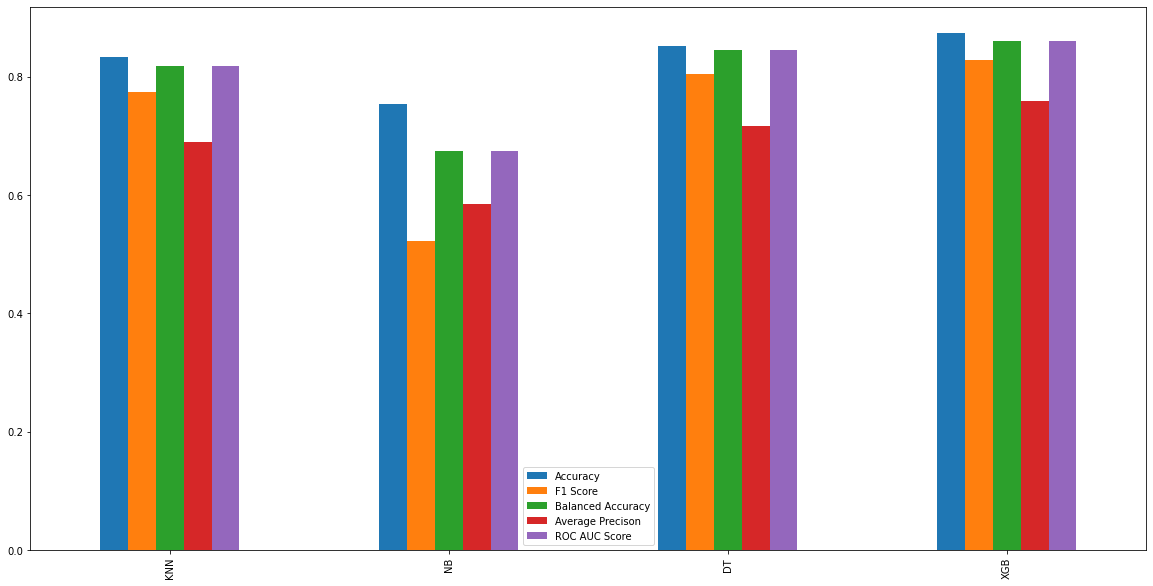

In [117]:
metrics_df.plot.bar()

Answer to (b) here:

Based on the results shown, XGB showed the best accuracy and the best average precision. Based on the params selected, it efficiently performs on the data.

Answer to (c) here

According to the accuracy results of each model, XGB proved to be the best model as it had the highest accuracy, balanced accuracy, average precison, f1 score and ROC AUC score.

###  4
Using best overall model, plot the following:

#### (a)
Confusion Matrix (appropriate labels should be shown)

#### (b)
Precision Recall curve

#### (c)
ROC curve (Also show ROC for random classifier on the same plot)

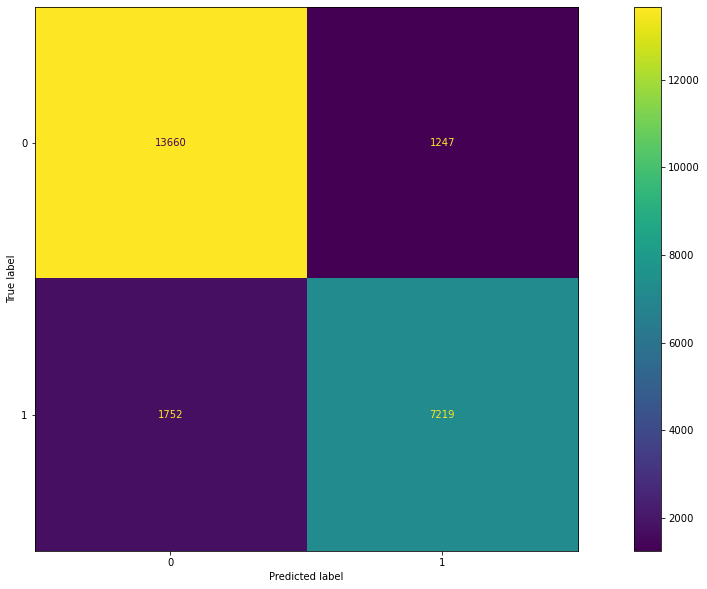

In [118]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe_xgb, X_test, y_test)  
plt.show()

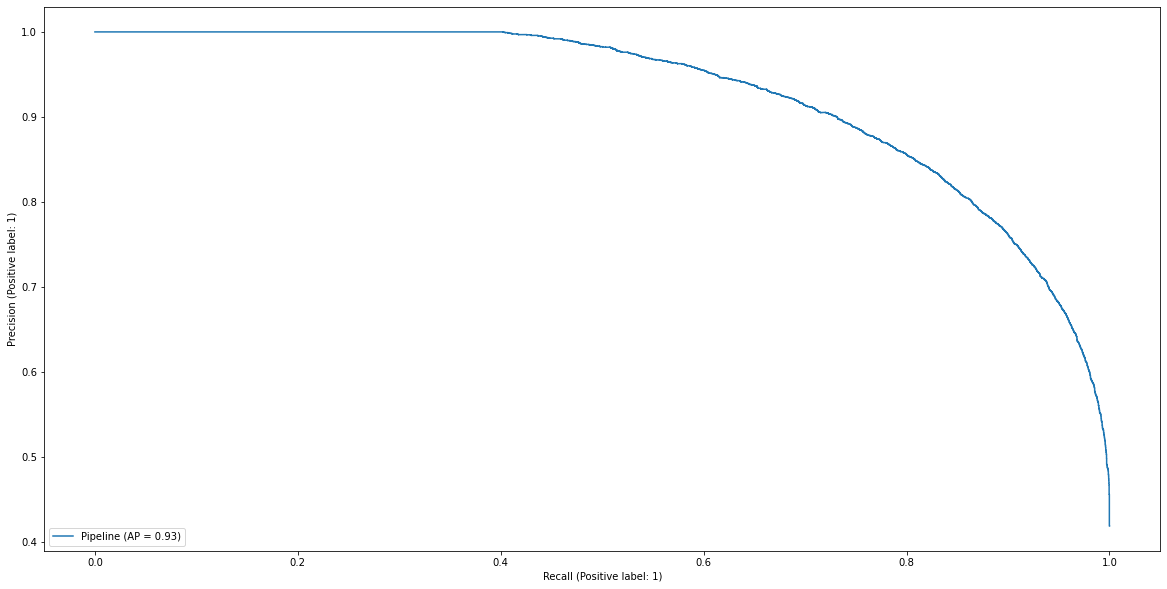

In [123]:
from sklearn.metrics import average_precision_score , plot_precision_recall_curve
plot_precision_recall_curve(pipe_xgb, X_test, y_test)


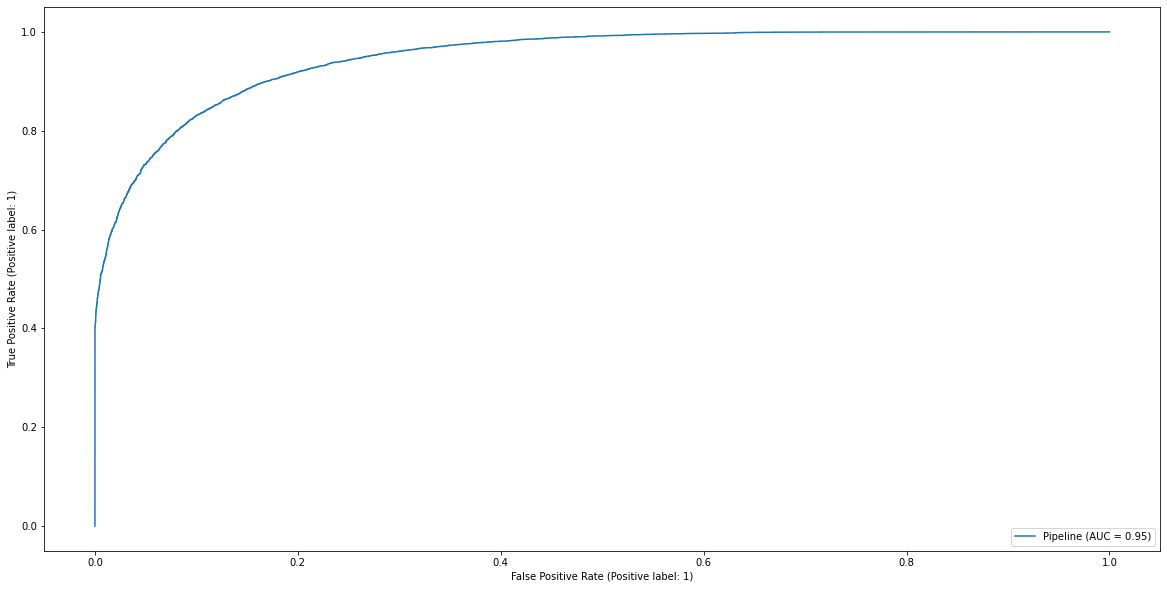

In [124]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.plot_roc_curve(pipe_xgb, X_test, y_test)
plt.show()